# 小世界模型：人的聚类计算

Clustering Coefficient: 0.9040724893110166


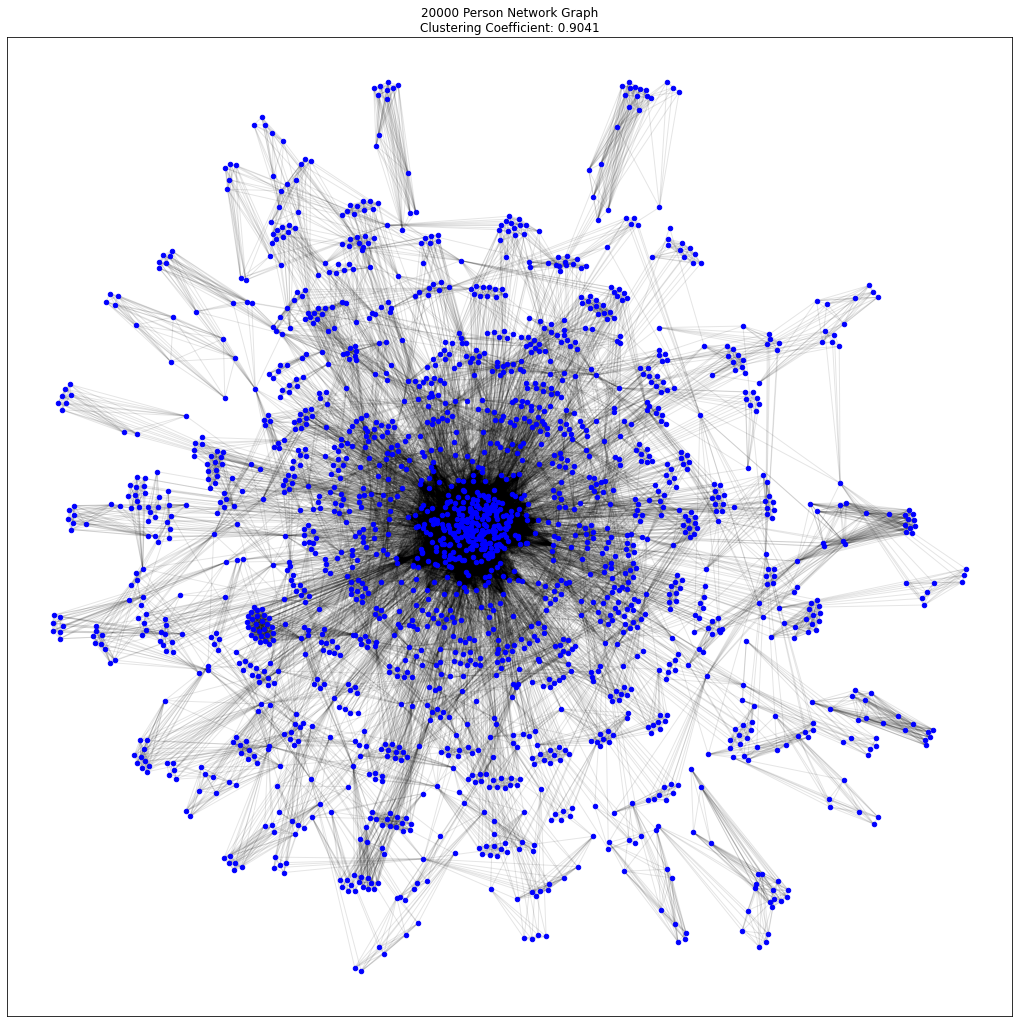

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 加载数据
file_path = '2011_v2.0\combined.txt'  
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# 只取前2000个人的数据
df_sample = df[df['person'].isin(df['person'].unique()[:2000])]

# 创建一个双模式图
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# 添加边
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# 将双模式图投影为单模式图（仅包含person节点）
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# 计算聚类系数
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# 绘制网络图
plt.figure(figsize=(18, 18))
pos = nx.spring_layout(persons_graph, k=0.15,iterations=50)
nx.draw_networkx_nodes(persons_graph, pos, node_size=20, node_color='blue')
nx.draw_networkx_edges(persons_graph, pos, alpha=0.1)
plt.title(f"20000 Person Network Graph\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.show()


这段代码的作用是计算给定数据集中人员之间的网络的平均聚类系数。具体来说，它通过以下步骤完成：

加载数据：读取包含人员和组织关系的文件。

创建双模式图：构建一个双模式图（也称为二分图），其中包含两类节点：人员（persons）和组织（organizations）。人员和组织之间的连接表示人员属于特定的组织。

投影为单模式图：将双模式图投影为单模式图，仅保留人员节点。两个人员节点之间的边表示他们属于同一个组织。

计算聚类系数：计算单模式图中人员节点的平均聚类系数。

Clustering Coefficient: 0.8538894574063951


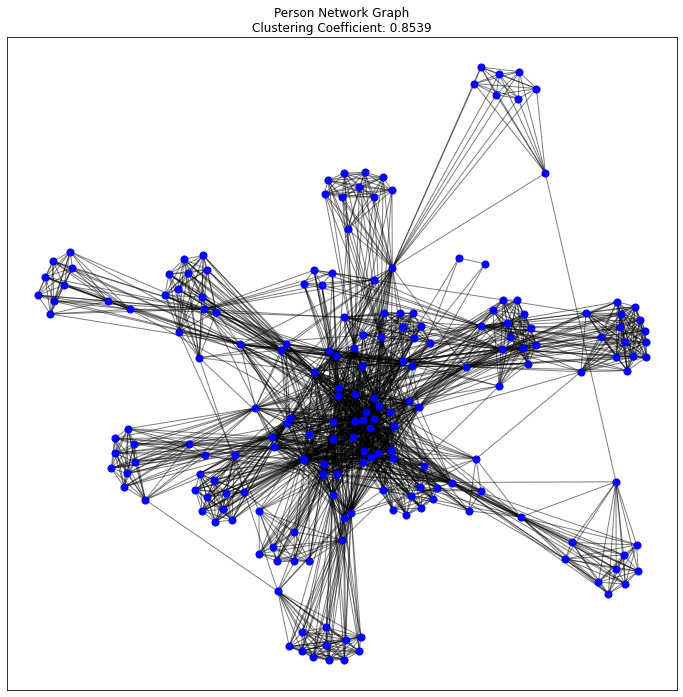

In [11]:
# 加载数据
file_path = 'combined.txt'  # 更新为文件的实际路径
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# 只取前200个人的数据
df_sample = df[df['person'].isin(df['person'].unique()[:200])]

# 创建一个双模式图
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# 添加边
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# 将双模式图投影为单模式图（仅包含person节点）
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# 计算聚类系数
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# 绘制网络图
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(persons_graph)
nx.draw_networkx_nodes(persons_graph, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(persons_graph, pos, alpha=0.5)
plt.title(f"Person Network Graph\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.show()

clustering coefficient是一个数值，表示网络中人员节点的聚集程度。它介于0和1之间，数值越高，表示网络中节点的邻居之间互联程度越高。具体来说，它衡量了一个节点的邻居实际上相互连接的概率。
举例说明：如果计算出的聚类系数为0.432，这意味着在这个网络中，人员节点的邻居之间有43.2%的可能性是相互连接的。

# 显示前200人中聚类的中心节点

Clustering Coefficient: 0.8538894574063951


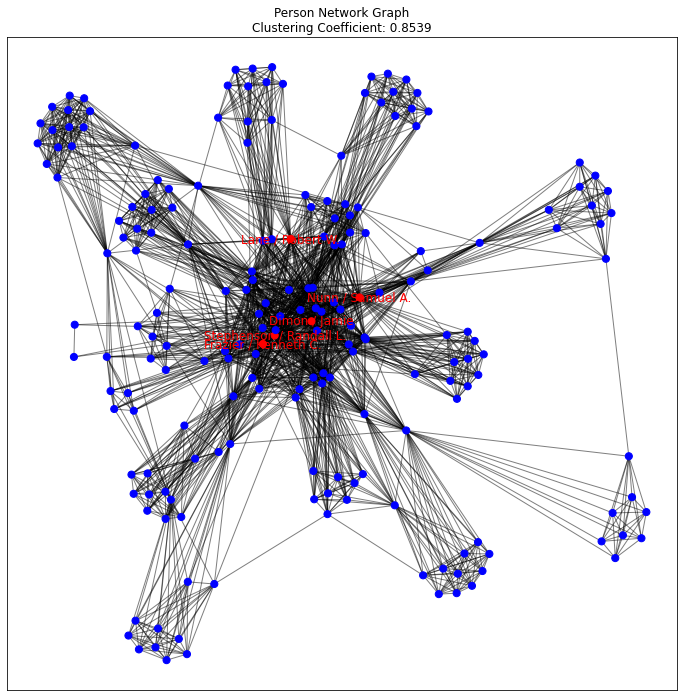

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 加载数据
file_path = 'combined.txt'  # 更新为文件的实际路径
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# 只取前200个人的数据
df_sample = df[df['person'].isin(df['person'].unique()[:200])]

# 创建一个双模式图
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# 添加边
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# 将双模式图投影为单模式图（仅包含person节点）
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# 计算聚类系数
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# 计算度中心性并识别中心节点
degree_centrality = nx.degree_centrality(persons_graph)
# 选择度中心性最高的前5个节点作为中心节点
num_central_nodes = 5
central_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:num_central_nodes]

# 设置节点颜色，中心节点为红色，其他节点为蓝色
node_colors = ['red' if node in central_nodes else 'blue' for node in persons_graph.nodes()]

# 绘制网络图
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(persons_graph)
nx.draw_networkx_nodes(persons_graph, pos, node_size=50, node_color=node_colors)
nx.draw_networkx_edges(persons_graph, pos, alpha=0.5)
nx.draw_networkx_labels(persons_graph, pos, labels={node: node for node in central_nodes}, font_color='red')
plt.title(f"Person Network Graph\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.show()


网络中连接数较多的节点，通常是重要人物或拥有广泛社交关系的人。
孤立节点或弱连接节点：与网络其他部分连接较少的节点，可能代表联系较少或边缘化的人员。【但这里也有可能是因数据不完整，因为只取了前200个人】

In [20]:
pip install python-louvain


     |████████████████████████████████| 204 kB 663 kB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9394 sha256=cf272e35f724547d174bb5242fc0f0ca4ce58127f908d7558a5ae65683285370
  Stored in directory: /Users/maxxx/Library/Caches/pip/wheels/af/40/91/ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


# Louvain算法检测社区

Clustering Coefficient: 0.8542418780463328


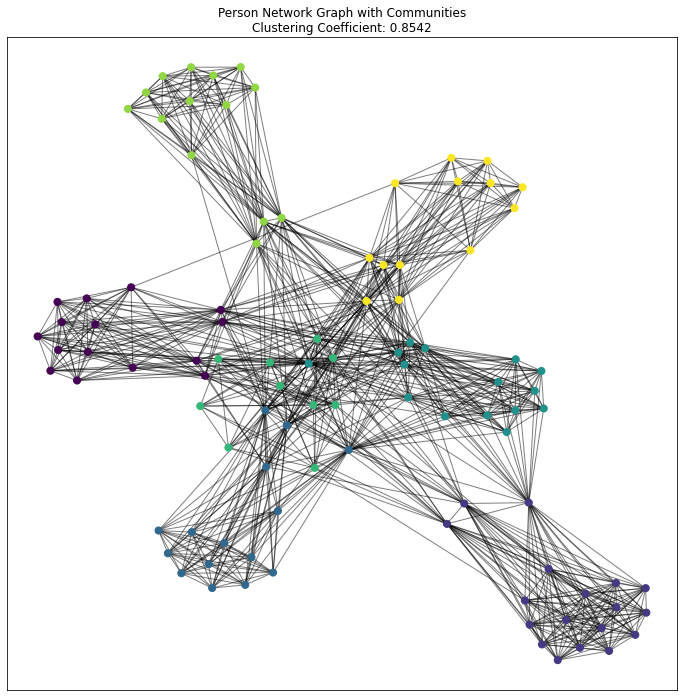

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# 加载数据
file_path = 'combined.txt'  # 更新为文件的实际路径
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# 只取前100个人的数据
df_sample = df[df['person'].isin(df['person'].unique()[:100])]

# 创建一个双模式图
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# 添加边
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# 将双模式图投影为单模式图（仅包含person节点）
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# 计算聚类系数
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# 使用Louvain算法检测社区
partition = community_louvain.best_partition(persons_graph)

# 为每个节点分配颜色
community_colors = []
for node in persons_graph.nodes():
    community_colors.append(partition[node])

# 绘制网络图
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(persons_graph)
nx.draw_networkx_nodes(persons_graph, pos, node_size=50, cmap=plt.get_cmap('viridis'), node_color=community_colors)
nx.draw_networkx_edges(persons_graph, pos, alpha=0.5)
plt.title(f"Person Network Graph with Communities\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.show()


## 社区标记和打印中心

Clustering Coefficient: 0.8542418780463328
Community 5:
 Members: ['Alvarez / Aida M.', 'Breyer / James W.', 'Burns / Michele M.', 'Cash / James I. Jr.', 'Corbett / Roger C.', 'Daft / Douglas N.', 'Duke / Michael T.', 'Kroenke / Stanley', 'Penner / Gregory B.', 'Reinemund / Steven S.', 'Scott / H. Lee Jr.', 'Sorenson / Arne M.', 'Walton / Alice L.', 'Walton / Christy', 'Walton / Jim C.', 'Walton / S. Robson', 'Williams / Christopher J.', 'Wolf / Linda S.']
 Center: Walton / Alice L.

Community 3:
 Members: ['Boskin / Michael J.', 'Brabeck-Letmathe / Peter', 'Faulkner / Larry R.', 'Fishman / Jay S.', 'Frazier / Kenneth C.', 'George / William W.', 'Nelson / Marilyn Carlson', 'Palmisano / Samuel J.', 'Tillerson / Rex W.', 'Whitacre / Edward E. Jr.']
 Center: Frazier / Kenneth C.

Community 0:
 Members: ['Armacost / Samuel H.', 'Deily / Linnet F.', 'Denham / Robert E.', 'Eaton / Robert J.', 'Hagel / Chuck', 'Hernandez / Enrique Jr.', 'Jenifer / Franklyn G.', 'Kirkland / George L.', 'Rice /

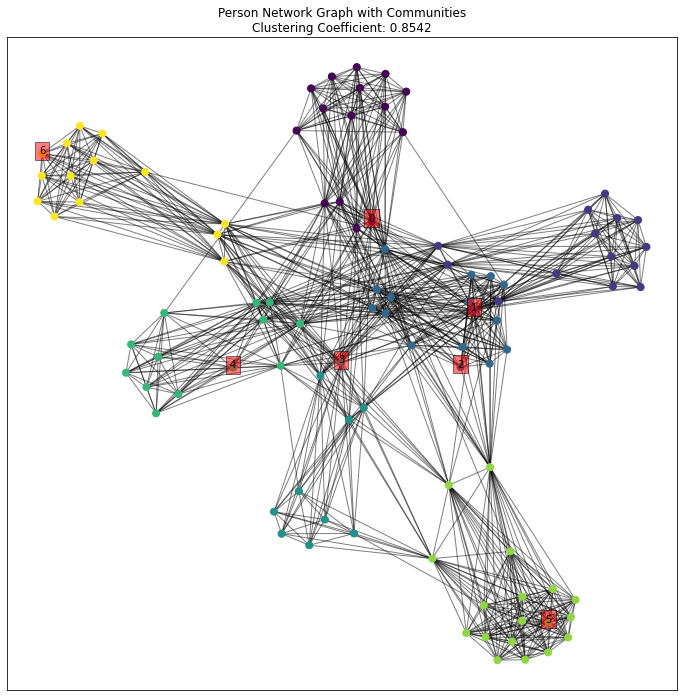

In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# 加载数据
file_path = 'combined.txt'  
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# 只取前100个人的数据
df_sample = df[df['person'].isin(df['person'].unique()[:100])]

# 创建一个双模式图
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# 添加边
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# 将双模式图投影为单模式图（仅包含person节点）
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# 计算聚类系数
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# 使用Louvain算法检测社区
partition = community_louvain.best_partition(persons_graph)

# 打印每个社区中的人和中心节点
communities = {}
community_centers = {}
for person, community in partition.items():
    if community not in communities:
        communities[community] = []
    communities[community].append(person)

for community, members in communities.items():
    # 计算每个社区的度中心性
    subgraph = persons_graph.subgraph(members)
    degree_centrality = nx.degree_centrality(subgraph)
    # 找到度中心性最高的节点，即社区的中心
    center = max(degree_centrality, key=degree_centrality.get)
    community_centers[community] = center
    print(f"Community {community}:")
    print(f" Members: {members}")
    print(f" Center: {center}\n")

# 为每个节点分配颜色
community_colors = [partition[node] for node in persons_graph.nodes()]

# 绘制网络图
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(persons_graph)
nx.draw_networkx_nodes(persons_graph, pos, node_size=50, cmap=plt.get_cmap('viridis'), node_color=community_colors)
nx.draw_networkx_edges(persons_graph, pos, alpha=0.5)

# 添加社区编号标签
for community, center in community_centers.items():
    x, y = pos[center]
    plt.text(x, y, str(community), bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')

plt.title(f"Person Network Graph with Communities\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.show()


社区划分和中心节点
通过Louvain算法检测社区后，我们可以打印每个社区中的成员，并计算每个社区的度中心性，识别社区的中心节点。度中心性最高的节点通常在社区中具有最多的连接，是社区的关键人物。

可视化社区编号：
在网络图中，每个社区的中心节点附近添加了标签，显示社区的编号。这样可以直观地识别每个社区及其在网络中的位置。

通过这种分析和可视化，可以更好地理解权力精英网络中的小团体结构，识别每个社区的关键人物及其在网络中的作用。

# 性别_人种的聚类系数计算

g_e
f-A    0.000000
f-B    0.124031
f-L    0.227273
f-M    0.000000
f-W    0.424560
m-A    0.146970
m-B    0.200068
m-L    0.100483
m-M    0.230769
m-W    0.922142
dtype: float64


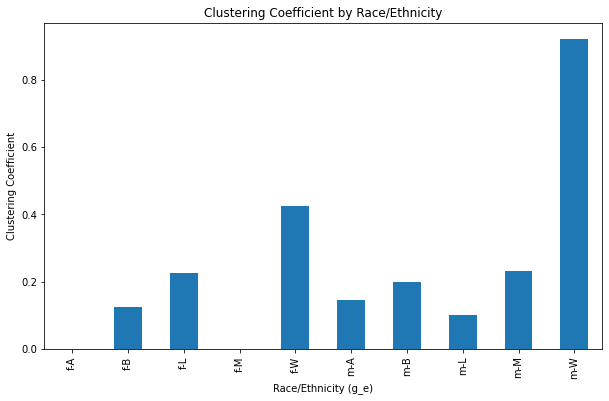

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 加载数据
file_path = 'combined.txt'  # 更新为文件的实际路径
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization', 'g_e'])

# 定义一个函数来计算聚类系数
def calculate_clustering_coefficient(group_df):
    B = nx.Graph()
    persons = group_df['person'].unique()
    organizations = group_df['organization'].unique()
    B.add_nodes_from(persons, bipartite=0)
    B.add_nodes_from(organizations, bipartite=1)
    edges = list(zip(group_df['person'], group_df['organization']))
    B.add_edges_from(edges)
    persons_graph = nx.bipartite.weighted_projected_graph(B, persons)
    return nx.average_clustering(persons_graph)

# 按照人种信息进行分组并计算聚类系数
grouped = df.groupby('g_e')
clustering_coefficients = grouped.apply(calculate_clustering_coefficient)

# 打印不同人种的聚类系数
print(clustering_coefficients)

# 绘制不同人种聚类系数的柱状图
clustering_coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Clustering Coefficient by Race/Ethnicity')
plt.xlabel('Race/Ethnicity (g_e)')
plt.ylabel('Clustering Coefficient')
plt.show()


## 高聚类系数说明：

男性的W族裔（m-W）：聚类系数为0.922142

解释：这一群体具有非常高的聚类系数，表明男性的W族裔在组织内部有着非常紧密的联系。成员之间互相认识的概率极高，形成了高度凝聚的社交网络。

意义：这种高聚集性可能意味着该群体在信息共享、资源分配和协作方面具有显著优势，因为信息可以在网络内部快速传播。

女性的W族裔（f-W）：聚类系数为0.424560

解释：这一群体的聚类系数也较高，表明女性的W族裔在组织内部有相对紧密的联系。

意义：尽管不如男性的W族裔紧密，但这个群体仍具有较高的内部连接性，可能在社交支持和资源共享方面表现良好。


## 低聚类系数群体
女性的A族裔（f-A）：聚类系数为0.000000

解释：这一群体的聚类系数为零，表明女性的A族裔在组织内部几乎没有形成连接。
意义：这种情况可能意味着该群体的成员彼此之间缺乏联系，可能会面临信息孤立或资源分散的问题。


女性的M族裔（f-M）：聚类系数为0.000000

解释：这一群体的聚类系数也为零，表明女性的M族裔在组织内部同样缺乏联系。
意义：与女性的A族裔类似，这一群体可能也面临社交孤立和资源获取的困难。


## 社交支持与资源共享：

高聚类系数群体（如男性的W族裔）可能在社交支持和资源共享方面具有显著优势，因为成员之间的高联系度使得信息和资源能够迅速传播和共享。
低聚类系数群体（如女性的A族裔和M族裔）则可能在这些方面面临挑战，需要更多的外部支持和资源获取途径。
网络韧性与信息传播：

高聚类系数的网络通常更具韧性，能够在面对外部冲击时更好地维持内部稳定性。
中等或低聚类系数的网络在信息传播方面可能效率较低，容易受到断裂或孤立的影响。
组织管理与策略：

了解这些差异可以帮助组织制定更有针对性的管理策略，促进不同群体之间的联系和协作，提高整体的组织凝聚力和工作效率。

## 网络韧性与信息传播：

高聚类系数的网络通常更具韧性，能够在面对外部冲击时更好地维持内部稳定性。

中等或低聚类系数的网络在信息传播方面可能效率较低，容易受到断裂或孤立的影响。

## 总结
不同人种和性别群体的聚类系数差异反映了其内部社交网络的结构特征。高聚类系数群体显示出强大的内部联系和网络效应，而低聚类系数群体则可能面临更多的孤立和协作挑战。这些信息对于理解和优化组织内部的社交动态具有重要意义。

# 人种之间的聚类计算及结果说明

race
A    0.134988
B    0.263159
L    0.127339
M    0.333333
W    0.921370
dtype: float64


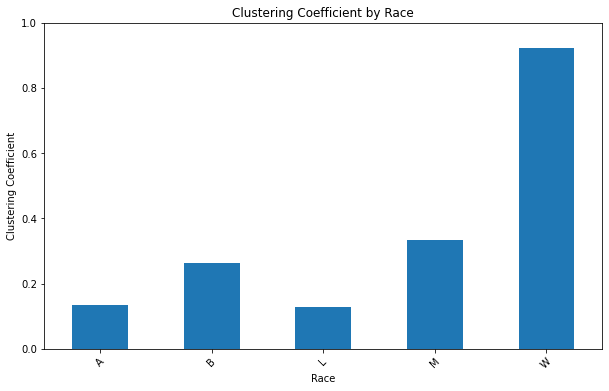

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 加载数据
file_path = 'combined.txt'  # 更新为文件的实际路径
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization', 'g_e'])

# 提取人种信息（去掉性别前缀）
df['race'] = df['g_e'].str[2:]

# 定义一个函数来计算聚类系数
def calculate_clustering_coefficient(group_df):
    B = nx.Graph()
    persons = group_df['person'].unique()
    organizations = group_df['organization'].unique()
    B.add_nodes_from(persons, bipartite=0)
    B.add_nodes_from(organizations, bipartite=1)
    edges = list(zip(group_df['person'], group_df['organization']))
    B.add_edges_from(edges)
    persons_graph = nx.bipartite.weighted_projected_graph(B, persons)
    return nx.average_clustering(persons_graph)

# 按人种分组并计算聚类系数
grouped = df.groupby('race')
clustering_coefficients = grouped.apply(calculate_clustering_coefficient)

# 打印不同人种的聚类系数
print(clustering_coefficients)

# 绘制不同人种聚类系数的柱状图
clustering_coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Clustering Coefficient by Race')
plt.xlabel('Race')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # 聚类系数在0到1之间
plt.show()


## 网络紧密性与影响力

高聚类系数（如W族裔）显示出强大的内部联系和凝聚力，这通常与更高的影响力和更强的网络韧性相关。这样的群体在权力精英网络中通常能够更有效地协作和维护其地位。

低聚类系数（如A族裔和L族裔）表明这些群体的内部联系较少，可能在权力结构中处于边缘地位，面临信息孤立和资源获取的挑战。


## 信息传播效率

高聚类系数群体的信息传播效率更高，因为成员之间的联系紧密，信息可以迅速传递。这使得这些群体在决策和响应变化时更加灵活和有效。

低聚类系数群体的信息传播效率较低，可能导致信息滞后和决策不一致，影响其在权力网络中的竞争力。


## 策略性协作

中等聚类系数群体（如M族裔和B族裔）可能需要通过策略性协作来提升其内部联系和影响力。

他们可以通过建立更多的内部联系和加强与其他群体的合作来提升其地位。

## 总结
这些聚类系数揭示了不同人种群体在权力精英网络中的内部联系特征。高聚类系数群体（如W族裔）在权力结构中具有强大的内部支持和更高的影响力，而低聚类系数群体（如A族裔和L族裔）可能面临更多的挑战，需要更多的外部支持和策略性协作来提升其地位和影响力。这种分析对于理解和优化权力精英网络中的社交动态具有重要意义。

## 聚类系数 + 平均最短距离

Clustering Coefficient: 0.8538894574063951
Average Shortest Path Length: 2.4263819095477386


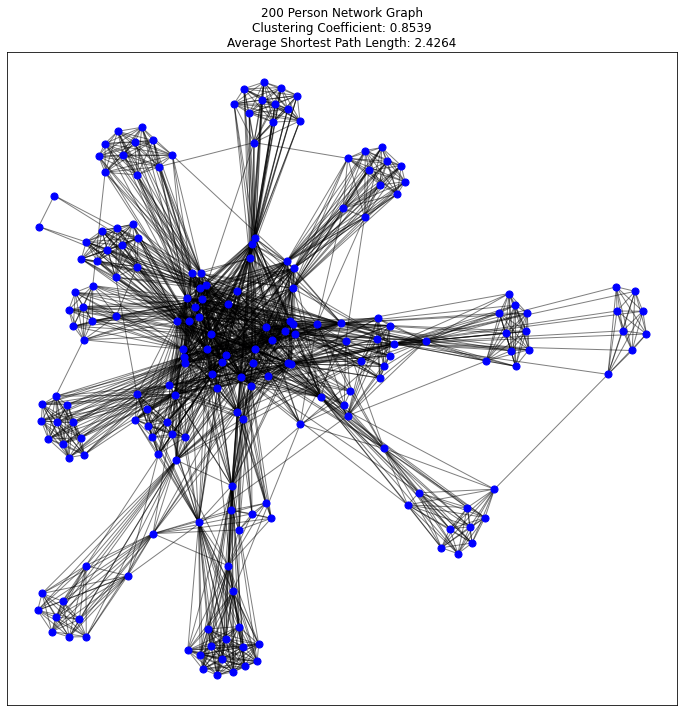

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 加载数据
file_path = 'combined.txt'
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# 只取前2000个人的数据
df_sample = df[df['person'].isin(df['person'].unique()[:200])]

# 创建一个双模式图
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# 添加边
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# 将双模式图投影为单模式图（仅包含person节点）
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# 计算聚类系数
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# 计算平均最短路径长度
if nx.is_connected(persons_graph):
    average_shortest_path_length = nx.average_shortest_path_length(persons_graph)
    print(f"Average Shortest Path Length: {average_shortest_path_length}")
else:
    # 如果图不连通，只计算最大连通子图的平均最短路径长度
    largest_cc = max(nx.connected_components(persons_graph), key=len)
    subgraph = persons_graph.subgraph(largest_cc)
    average_shortest_path_length = nx.average_shortest_path_length(subgraph)
    print(f"Average Shortest Path Length (Largest Component): {average_shortest_path_length}")

# 绘制网络图
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(persons_graph)
nx.draw_networkx_nodes(persons_graph, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(persons_graph, pos, alpha=0.5)
plt.title(f"200 Person Network Graph\nClustering Coefficient: {clustering_coefficient:.4f}\n"
          f"Average Shortest Path Length: {average_shortest_path_length:.4f}")
plt.show()


平均最短路径长度是指网络中所有节点对之间的最短路径的平均值。它衡量了网络中信息从一个节点传播到另一个节点的效率。

这个值表示在这个网络中，从一个节点到另一个节点的平均最短路径长度约为2.43。
这个值较低，说明在这个网络中，节点之间的距离较短，信息传播效率较高。

这种结构表明信息、资源或影响力可以在权力精英网络中快速传播。权力精英之间的联系紧密且高效，能够迅速响应和协调行动。
短路径长度也意味着网络具有较高的整体效率，权力精英可以在需要时快速接触和动员他们的资源和影响力。